# <div style="color:yellow;display:fillin;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Bellevue City: Salary & Benefits Analysis (2014-Present)</p></div>



![image](https://storage.googleapis.com/kaggle-datasets-images/3664655/6361818/ec145567c92158d1c8ab5f94d071d19f/dataset-cover.png?t=2023-08-25-06-27-33)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>1️⃣.  </b>Introduction</p></div>

This dataset provides a comprehensive overview of salary and benefits costs incurred by the City of Bellevue, with a focus on different job titles. Spanning from 2014 to the present, the dataset encompasses historical data, shedding light on the financial commitments associated with various positions within the city. This valuable resource offers insights into the allocation of resources and financial trends within the City of Bellevue.

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>2️⃣. </b>Import Libraries</p></div>


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>3️⃣. </b>Data Loading and Exploration</p></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Load the dataset using a suitable library like pandas.</b></span>

In [2]:
data =pd.read_csv('/kaggle/input/salaries-and-benefits-by-job-title/Salaries_and_Benefits_by_Job_Title.csv')

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Explore the first few rows of the dataset to understand its structure.</b></span>

In [3]:
data.head().style.set_properties(**{"background-color": "#8338EC","color":"#A8DADC","border": "1.5px solid Black"})

,Year,Department,Job Code,Wages,Overtime,Fixed Benefits,Variable Benefits,Total,ObjectId
0,16,Parks & Community Services,AMG605 - Office Asst - PBM,3941.080000,nan,nan,449.570000,4390.650000,1
1,17,Parks & Community Services,AMG605 - Office Asst - PBM,5891.990000,nan,nan,537.200000,6429.190000,2
2,18,Parks & Community Services,AMG605 - Office Asst - PBM,5103.080000,nan,nan,449.300000,5552.380000,3
3,14,Parks & Community Services,AMG605 - Office Asst - PBM,10426.250000,nan,nan,1205.970000,11632.220000,4
4,15,Parks & Community Services,AMG605 - Office Asst - PBM,24947.100000,nan,nan,2802.440000,27749.540000,5


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Check for null values. If any are found, remove them.</b></span>

In [4]:
data_num_rows, data_num_cols = data.shape
print(f'Data \nNumber of rows : {data_num_rows}\nNumber of columns: {data_num_cols}')

Data 
Number of rows : 17061
Number of columns: 9


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Basic info</b></span>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17061 entries, 0 to 17060
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17061 non-null  object 
 1   Department         17059 non-null  object 
 2   Job Code           17059 non-null  object 
 3   Wages              17051 non-null  float64
 4   Overtime           5822 non-null   float64
 5   Fixed Benefits     13220 non-null  float64
 6   Variable Benefits  17058 non-null  float64
 7   Total              17061 non-null  float64
 8   ObjectId           17061 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.2+ MB


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Count null/nan values</b></span>

In [6]:
data.isna().sum()

Year                     0
Department               2
Job Code                 2
Wages                   10
Overtime             11239
Fixed Benefits        3841
Variable Benefits        3
Total                    0
ObjectId                 0
dtype: int64

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>4️⃣. </b>Data Cleaning</p></div>




> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Handle missing values appropriately (e.g., replace with zeros or mean values).</b></span>

In [7]:
# Checking the null values in the data set
data.isna().sum()/len(data)*100

Year                  0.000000
Department            0.011723
Job Code              0.011723
Wages                 0.058613
Overtime             65.875388
Fixed Benefits       22.513335
Variable Benefits     0.017584
Total                 0.000000
ObjectId              0.000000
dtype: float64

In [8]:
# Replacing NaN with zeros
data_filled = data.fillna(0)

# Checking the null values in the data set after filling NaN with zeros
missing_percent = data_filled.isna().sum() / len(data_filled) * 100

print("Percentage of missing values after replacing NaN with zeros:")
print(missing_percent)

Percentage of missing values after replacing NaN with zeros:
Year                 0.0
Department           0.0
Job Code             0.0
Wages                0.0
Overtime             0.0
Fixed Benefits       0.0
Variable Benefits    0.0
Total                0.0
ObjectId             0.0
dtype: float64


In [9]:
#Checking the Percentage of the null values in the dataset
null_values=data.isna().sum()
total_missing_values=null_values.sum()
percentage_missing_values=(total_missing_values)*100
print(f'The data set contains {percentage_missing_values} of values')

The data set contains 1509700 of values


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Inspect for duplicate values and remove them if present.</b></span>

In [10]:
# Checking the duplicate values in the dataset
duplicate=data.duplicated().sum()
print(f'There are {duplicate} values in the data set; we will remove them.')

There are 0 values in the data set; we will remove them.


In [11]:
data.columns

Index(['Year', 'Department', 'Job Code', 'Wages', 'Overtime', 'Fixed Benefits',
       'Variable Benefits', 'Total', 'ObjectId'],
      dtype='object')

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Convert data types if necessary (e.g., convert 'Year' to datetime).</b></span>

In [12]:
data.fillna(0, inplace=True)  # Replace missing values with zeros
data = data[data['Year'] != 'GRAND TOTAL']  # Remove rows with 'GRAND TOTAL'
data['Year'] = pd.to_datetime(data['Year'], format='%y')  # Convert 'Year' to datetime


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>5️⃣. </b>Data Preparation</p></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Generate statistics about the data using the describe function.</b></span>

In [13]:
data.describe().style.background_gradient(cmap='tab20c')

,Wages,Overtime,Fixed Benefits,Variable Benefits,Total,ObjectId
count,17060.000000,17060.000000,17060.000000,17060.000000,17060.000000,17060.000000
mean,53302.911835,2774.128028,8952.195555,9921.904735,74951.140152,8530.500000
std,45716.315837,7344.560637,7593.812323,8482.791280,63715.445536,4924.942132
min,-10196.860000,-993.240000,-14318.710000,-570.060000,-19061.650000,1.000000
25%,7599.760000,0.000000,1.577500,1465.520000,10160.372500,4265.750000
50%,52356.670000,0.000000,11201.400000,9580.790000,75959.800000,8530.500000
75%,92012.095000,766.167500,16837.395000,16791.315000,129080.477500,12795.250000
max,327212.890000,91382.760000,30023.230000,52370.630000,395086.700000,17060.000000


In [14]:
data.describe(include=['object'])

,Department,Job Code
count,17060,17060
unique,17,445
top,Parks & Community Services,RMR702 - Rec Asst 2 - PBM Rate 7
freq,5067,1185


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Calculate the total wages, including regular wages, overtime, fixed benefits, and variable benefits.</b></span>

In [15]:
data['Total Wages'] = data['Wages'] + data['Overtime'] + data['Fixed Benefits'] + data['Variable Benefits']

# Print the updated DataFrame
data.head().style.background_gradient(cmap='tab20c')


,Year,Department,Job Code,Wages,Overtime,Fixed Benefits,Variable Benefits,Total,ObjectId,Total Wages
0,2016-01-01 00:00:00,Parks & Community Services,AMG605 - Office Asst - PBM,3941.080000,0.000000,0.000000,449.570000,4390.650000,1,4390.650000
1,2017-01-01 00:00:00,Parks & Community Services,AMG605 - Office Asst - PBM,5891.990000,0.000000,0.000000,537.200000,6429.190000,2,6429.190000
2,2018-01-01 00:00:00,Parks & Community Services,AMG605 - Office Asst - PBM,5103.080000,0.000000,0.000000,449.300000,5552.380000,3,5552.380000
3,2014-01-01 00:00:00,Parks & Community Services,AMG605 - Office Asst - PBM,10426.250000,0.000000,0.000000,1205.970000,11632.220000,4,11632.220000
4,2015-01-01 00:00:00,Parks & Community Services,AMG605 - Office Asst - PBM,24947.100000,0.000000,0.000000,2802.440000,27749.540000,5,27749.540000


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Group data by department and calculate total wages for each department.</b></span>

In [16]:
department_wages = data.groupby('Department')['Total Wages'].sum()

# Print the first few rows of the department_wages Series with custom formatting
print("Top 5 Departments by Total Wages:")
print(department_wages.head().to_string())


Top 5 Departments by Total Wages:
Department
0                     -87.69
All Depts            5089.70
City Attorney    27731982.45
City Clerk       13233865.89
City Council      2501277.44


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>6️⃣. </b>Data Visualization</p></div>



> <span style='font-size:15px; font-family:Verdana; color: #254E58;'>
    <b>Create visualizations to represent insights from the data:</b>
    <ul style='font-size:15px; font-family:Verdana; color: #254E58;'>
        <li>A bar plot showing the distribution of wages across departments.</li>
        <li>A line plot to visualize changes in wages over the years.</li>
    </ul>
> </span>


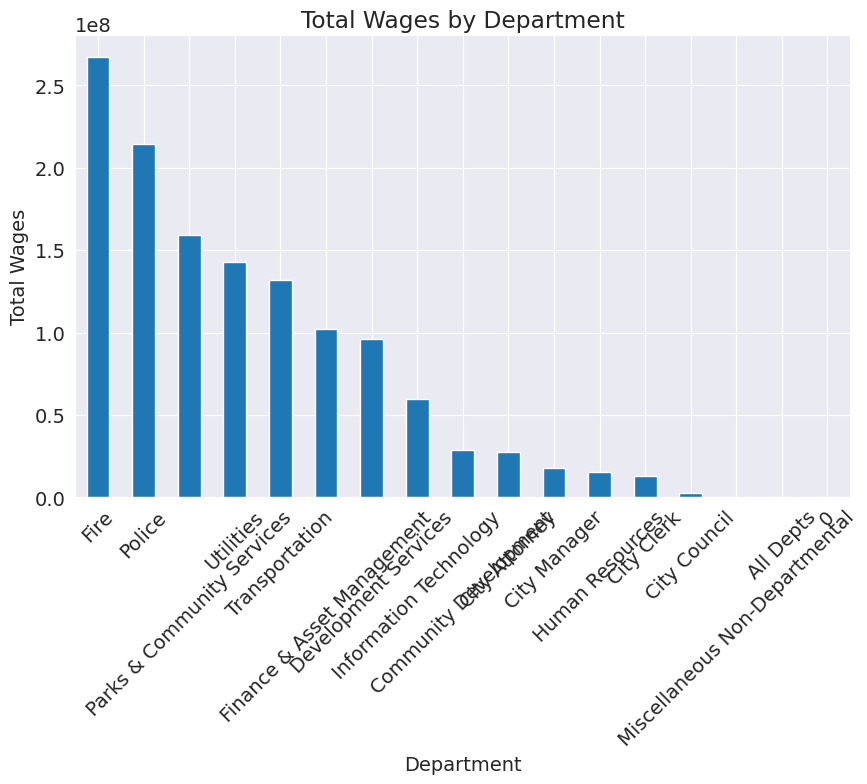

In [17]:
plt.figure(figsize=(10, 6))
department_wages.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Wages by Department')
plt.ylabel('Total Wages')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.savefig('Total Wages by Department.png')
plt.show()

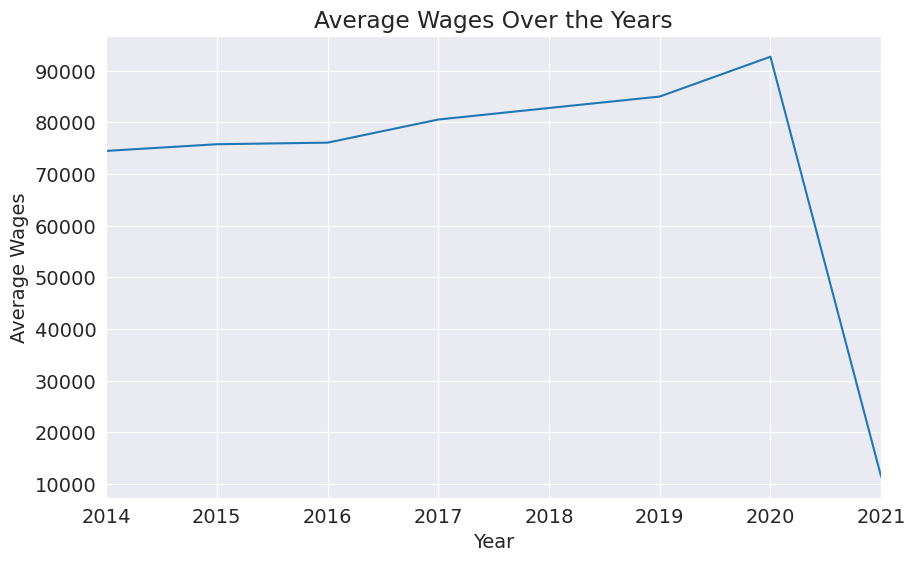

In [18]:
plt.figure(figsize=(10, 6))
data.groupby('Year')['Total Wages'].mean().plot(kind='line')
plt.title('Average Wages Over the Years')
plt.ylabel('Average Wages')
plt.xlabel('Year')
plt.savefig('Average Wages Over the Years.png')
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Visualize the correlation map to understand the relationships between columns.</b></span>


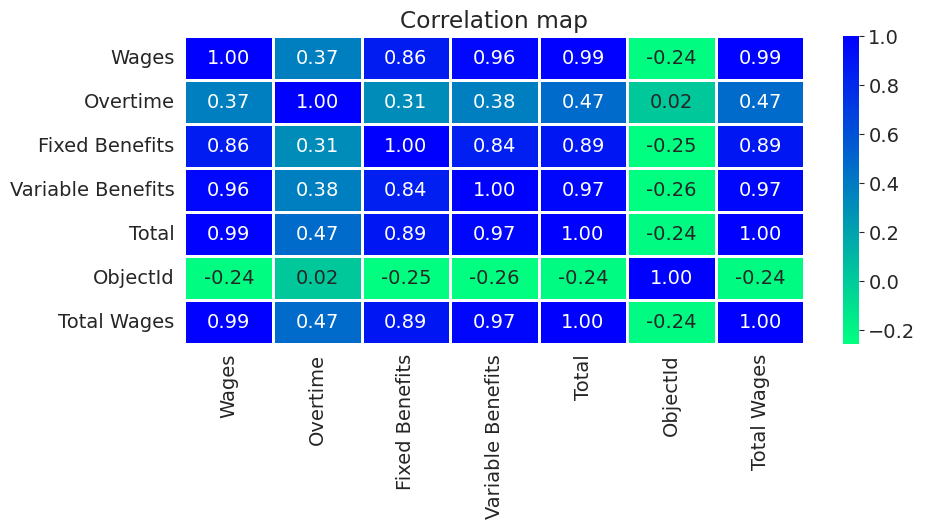

In [19]:
# Checking the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(data.corr(), annot=True, cmap='winter_r', fmt='.2f', linewidths=1)
plt.title("Correlation map")
plt.savefig('Correlation map.png')
plt.show()

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>7️⃣. </b>Insights and Analysis</p></div>

In [20]:
highest_wage_dept = department_wages.idxmax()
lowest_wage_dept = department_wages.idxmin()
print(f'Highest average wage department: {highest_wage_dept}')
print(f'Lowest average wage department: {lowest_wage_dept}')


Highest average wage department: Fire
Lowest average wage department: 0


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>8️⃣. </b>Build Model and Prediction</p></div>




In [21]:
data = pd.read_csv('/kaggle/input/salaries-and-benefits-by-job-title/Salaries_and_Benefits_by_Job_Title.csv')

data.fillna(0, inplace=True)
data['Total Wages'] = data['Wages'] + data['Overtime'] + data['Fixed Benefits'] + data['Variable Benefits']
data = data[data['Year'] != 'GRAND TOTAL']  
X = data.drop(['Year', 'Department', 'Job Code', 'Total', 'ObjectId'], axis=1)
y = data['Department']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Load your dataset 
data = pd.read_csv('/kaggle/input/salaries-and-benefits-by-job-title/Salaries_and_Benefits_by_Job_Title.csv')

# Preprocessing
data.fillna(0, inplace=True)
data['Total Wages'] = data['Wages'] + data['Overtime'] + data['Fixed Benefits'] + data['Variable Benefits']

# Clean the 'Department' column by stripping whitespace
data['Department'] = data['Department'].str.strip()

# Check unique values in 'Department'
unique_departments = data['Department'].unique()
print(unique_departments)

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Department'])


X = data.drop(['Year', 'Department', 'Job Code', 'Total', 'ObjectId'], axis=1)
y = y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['Parks & Community Services' 'Finance & Asset Management'
 'Transportation' 'Community Development' 'City Attorney' 'Utilities'
 'Development Services' 'Fire' 'City Clerk' 'Information Technology'
 'City Manager' 'Human Resources' 'Miscellaneous Non-Departmental'
 'Police' 'City Council' 'All Depts' nan]


In [23]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Modeling
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy


Learning rate set to 0.090409
0:	learn: 2.5147829	total: 105ms	remaining: 1m 44s
1:	learn: 2.3689136	total: 146ms	remaining: 1m 13s
2:	learn: 2.2606778	total: 180ms	remaining: 59.9s
3:	learn: 2.1799823	total: 215ms	remaining: 53.6s
4:	learn: 2.1122339	total: 248ms	remaining: 49.4s
5:	learn: 2.0588428	total: 281ms	remaining: 46.5s
6:	learn: 2.0097616	total: 316ms	remaining: 44.8s
7:	learn: 1.9702120	total: 351ms	remaining: 43.5s
8:	learn: 1.9382367	total: 386ms	remaining: 42.5s
9:	learn: 1.9095489	total: 424ms	remaining: 42s
10:	learn: 1.8822105	total: 456ms	remaining: 41s
11:	learn: 1.8562424	total: 490ms	remaining: 40.3s
12:	learn: 1.8338961	total: 524ms	remaining: 39.8s
13:	learn: 1.8137923	total: 557ms	remaining: 39.2s
14:	learn: 1.7974139	total: 590ms	remaining: 38.7s
15:	learn: 1.7823238	total: 622ms	remaining: 38.2s
16:	learn: 1.7684867	total: 655ms	remaining: 37.9s
17:	learn: 1.7563003	total: 690ms	remaining: 37.7s
18:	learn: 1.7437391	total: 724ms	remaining: 37.4s
19:	learn: 1.

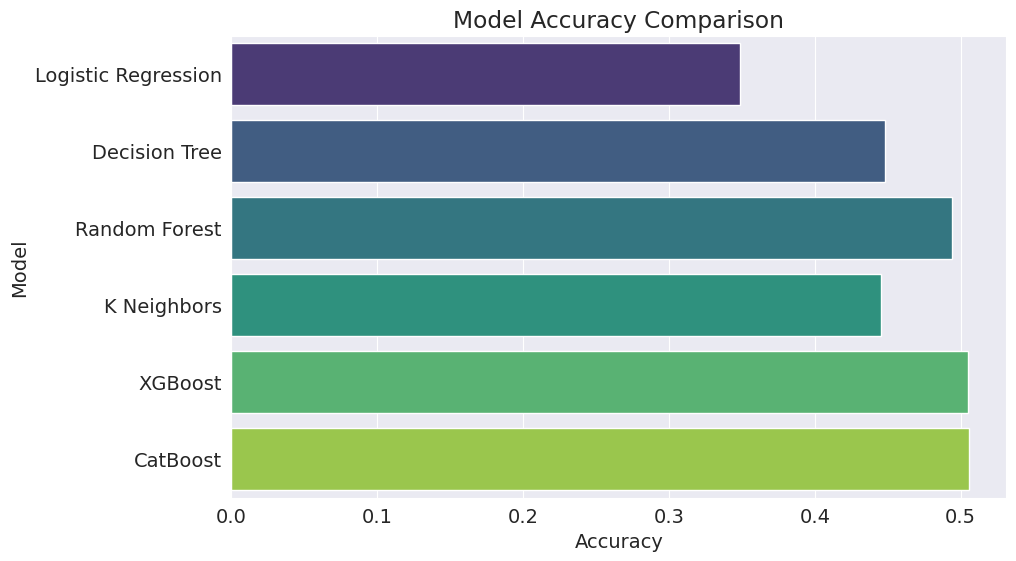

In [25]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.savefig('Model Accuracy Comparison.png')
plt.show()